In [1]:
import pandas as pd
import ast
import os
import matplotlib
import matplotlib.pyplot as plt 
import datetime
import numpy as np
import calplot

In [2]:
# Code for reading and creating a dataframe from the data/ folder. Very slow. Don't use unless you know what you're doing
"""
df = pd.DataFrame()
directory = os.fsencode("data")
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if "CMS" not in filename:
        continue
    with open("data/" + filename, 'r') as f:
        input = f.read()
        input = input.replace("\n", " ")
        d = ast.literal_eval(input)
        timestamp = int(filename.split("_")[1])
        time = datetime.datetime.fromtimestamp(timestamp)
        df = pd.concat([pd.DataFrame([[d['dedicated_space']['current_count'], time, time.weekday(), time.hour + round(time.minute / 30.0) / 2]], columns=["count", "time", "weekday", "hour"]), df], ignore_index = True)
df.index = pd.to_datetime(df["time"])
df
""";

In [16]:
# Read some pre-cleaned and prepared data
df = pd.read_csv("fa23_rsf_data.csv", index_col="time", parse_dates=True)

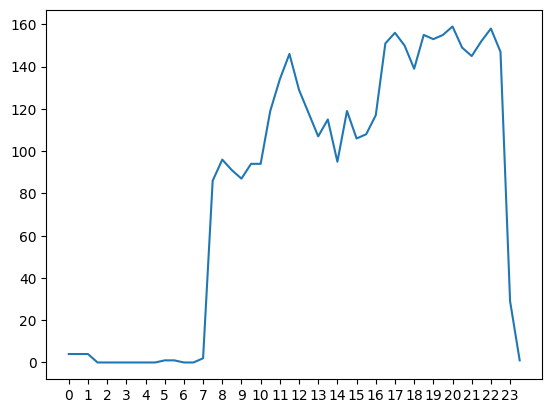

In [4]:
# Construct a sample 24 hour graph for October 30
rows = df[(df.index > datetime.datetime(2023, 10, 30)) & (df.index < datetime.datetime(2023, 10, 31))]

y = rows["count"]
x = rows["hour"]

plt.plot(x, y)
plt.xticks(range(0, 24));

In [5]:
# Create an average population count for each half hour reading of each day 
weekAvg = df[["weekday", "hour", "count"]].groupby(["weekday", "hour"]).aggregate("mean")["count"]
weekAvg

weekday  hour
0        0.0      1.764706
         0.5      1.764706
         1.0      1.764706
         1.5      0.176471
         2.0      0.294118
                   ...    
6        21.5    94.823529
         22.0    90.647059
         22.5    64.764706
         23.0    11.176471
         23.5     1.764706
Name: count, Length: 336, dtype: float64

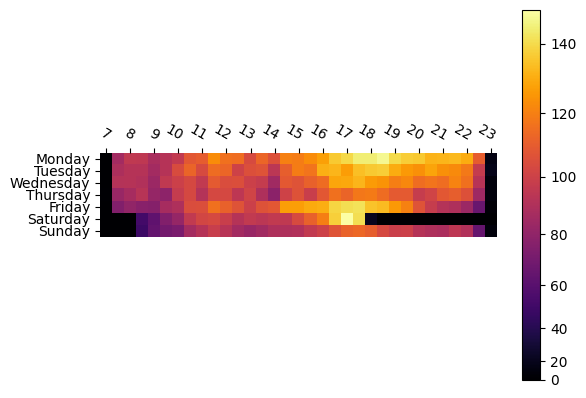

In [24]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(0, data.shape[1], 2), labels=col_labels)
    ax.set_yticks(np.arange(0, data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    #ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    #ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    #ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    #ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

# Plot a heatmap of the weekAvg during RSF opening hours (7am-11pm)
weekAvgArray = []
for i in range(0, 48 * 7, 48):
    weekAvgArray.append(weekAvg.values[i + 14 : i + 47])
weekAvgArray = np.array(weekAvgArray)

# PowerNorm color bar highlights hotspots better - the difference between 0 and 50 people in the gym is less important than the difference between 100 and 150 people
heatmap(weekAvgArray, ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], np.linspace(7, 23, 17).astype(int), cmap="inferno", norm=matplotlib.colors.PowerNorm(1.5));

In [21]:
# Construct an index of how many readings on a given day were over a threshold. Hint: RSF capacity is 150
THRESHOLD = 100

capacityDays = (df["count"] > THRESHOLD).groupby(df.index.to_series().dt.date).aggregate(['sum']).astype("int").iloc[1:] #Cuts out first day because that was a partial reading
capacityDays.index = pd.to_datetime(capacityDays.index)

capacityDays

,sum
time,
2023-08-23,30
2023-08-24,29
2023-08-25,29
2023-08-26,19
2023-08-27,23
...,...
2023-12-18,0
2023-12-19,0
2023-12-20,0


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


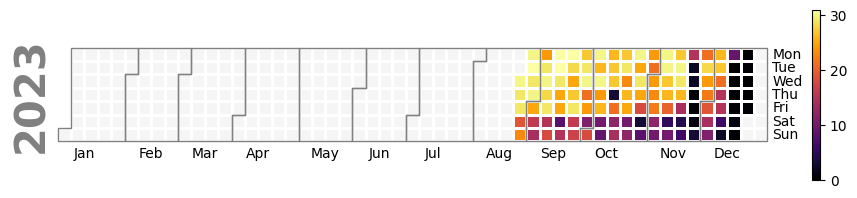

In [25]:
# Plot how days compare to each other in threshold readings per day. If THRESHOLD is set to 150 (rsf capacity) you can really see how crammed the gym is at the start of the semester
calplot.calplot(capacityDays["sum"], figsize=[10, 2], dropzero=False, cmap="inferno");

(0.0, 180.0)

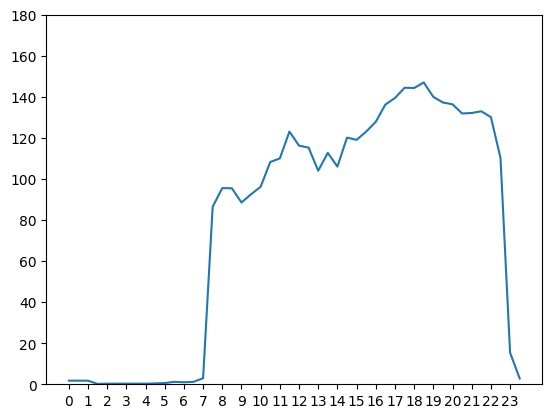

In [9]:
plt.plot(weekAvg[0])
plt.xticks(range(0, 24));
plt.ylim(0, 180)

(0.0, 180.0)

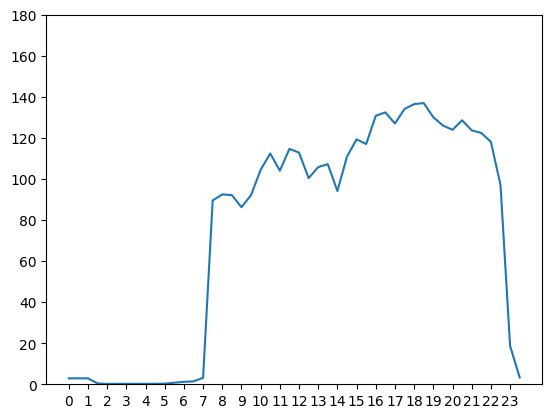

In [10]:
plt.plot(weekAvg[1])
plt.xticks(range(0, 24));
plt.ylim(0, 180)

(0.0, 180.0)

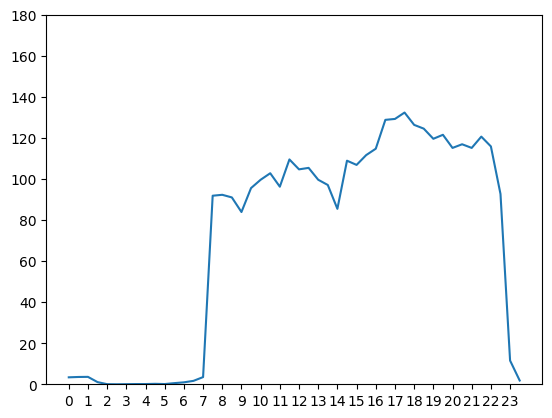

In [11]:
plt.plot(weekAvg[2])
plt.xticks(range(0, 24));
plt.ylim(0, 180)

(0.0, 180.0)

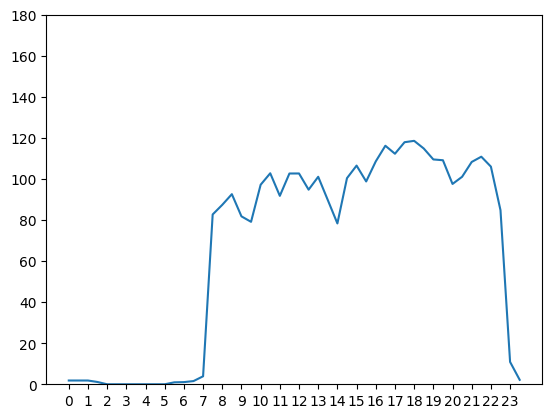

In [12]:
plt.plot(weekAvg[3])
plt.xticks(range(0, 24));
plt.ylim(0, 180)

(0.0, 180.0)

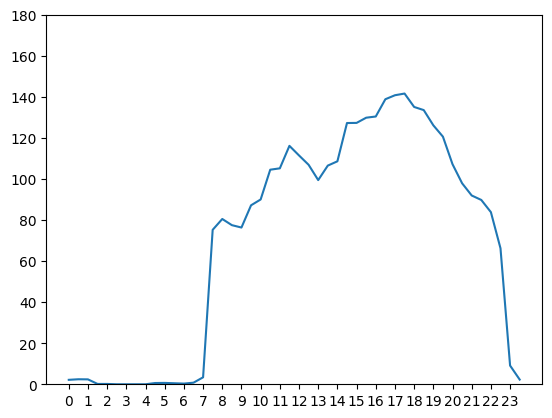

In [13]:
plt.plot(weekAvg[4])
plt.xticks(range(0, 24));
plt.ylim(0, 180)

(0.0, 180.0)

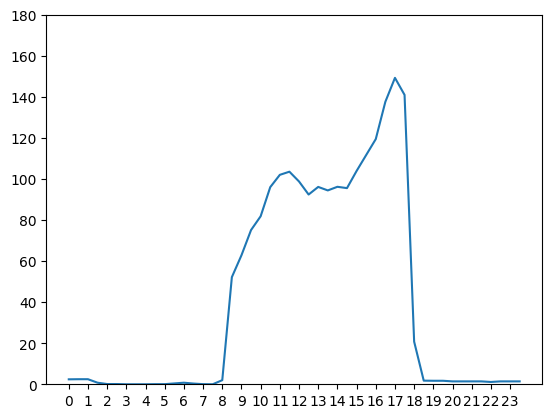

In [14]:
plt.plot(weekAvg[5])
plt.xticks(range(0, 24));
plt.ylim(0, 180)

(0.0, 180.0)

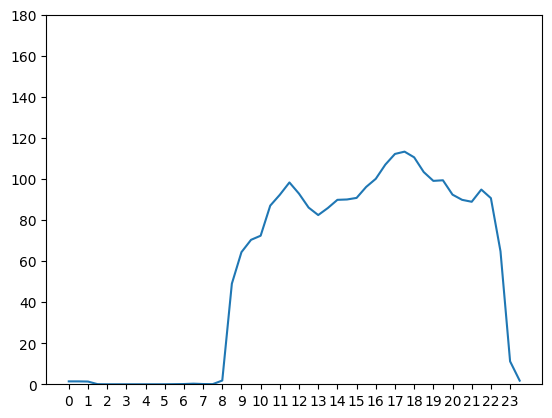

In [15]:
plt.plot(weekAvg[6])
plt.xticks(range(0, 24));
plt.ylim(0, 180)